In [1]:
# import mel spectra
BASE_FOLDER = '../../'
%run -i ..\..\utility\feature_extractor\JupyterLoad_feature_extractor.py

load feature_extractor_mother
load feature_extractor_mel_spectra


In [2]:
import pandas as pd

import os
import sys
import glob

def get_files(base_folder,SNR,machine,ID):
    
    fn = dict()
    fa = dict()
    
    for idx in ID:
        
        fn[idx] = sorted(glob.glob(os.path.abspath( "{base}/{SNR}/{machine}/id_{ID}/{n}/*.{ext}".format(
        base=base_folder+'dataset',SNR=SNR,machine=machine,ID=idx, n='normal',ext='wav' ))))
    
        fa[idx] = sorted(glob.glob(os.path.abspath( "{base}/{SNR}/{machine}/id_{ID}/{n}/*.{ext}".format(
        base=base_folder+'dataset',SNR=SNR,machine=machine,ID=idx, n='abnormal',ext='wav' ))))
    
    return fn, fa

In [3]:
# example to tune paramters
file_path = r'\dataset\6dB\valve\id_02\normal\00000004.wav'
fe_mel = feature_extractor_mel(BASE_FOLDER,'v1')
fe_mel.set_hyperparamter(n_fft=1024, n_mels=64, hop_length=82)
fe_mel.create_from_wav(file_path,0)
fe_mel.plot()

plt.show()
print(fe_mel.para_dict['wave_srate'])
print(fe_mel.name)
fe_mel.flat_feature().shape

FileNotFoundError: [Errno 2] No such file or directory: 'E:\\Capstone\\project\\NF_Prj_MIMII_Dataset\\dataset\\6dB\\valve\\id_02\\normal\\00000004.wav'

In [4]:
#fe_mel_master is taken for getting the paramters as used for 
# target_folder is from base folder werher to store the feature extractor pkl
# tuning by eye
def MEL_to_Pandas(base_folder,target_folder,fe_mel_master,
                  FileFindDict={'SNR': '6dB',
                                'machine': 'pump', 
                                'ID': ['00']},
                  FileCountlimit=None,verbose=True):
    
    nf, af = get_files(base_folder,
                       FileFindDict['SNR'],
                       FileFindDict['machine'],
                       FileFindDict['ID'])    
    # limit the File count
    for idx in nf:
        if FileCountlimit:
            if FileCountlimit < len(nf[idx]):
                nf[idx] = nf[idx][:FileCountlimit]
            if FileCountlimit < len(af[idx]):
                af[idx] = af[idx][:FileCountlimit]
                
    real_base_folder = os.path.abspath(base_folder)
    df = pd.DataFrame(columns=['path','abnormal','ID'])
    
    get_filename = lambda l: [os.path.basename(pl).replace('.'+'wav','') for pl in l]
        
    for idx in nf:
        df_temp_n = pd.DataFrame()
        df_temp_n['path'] = nf[idx]
        df_temp_n['file'] = get_filename(nf[idx])
        df_temp_n['abnormal'] = 0
        df_temp_n['ID'] = idx
        df_temp_a = pd.DataFrame()
        df_temp_a['path'] = af[idx]
        df_temp_a['file'] = get_filename(af[idx])
        df_temp_a['abnormal'] = 1
        df_temp_a['ID'] = idx
        df = df.append(df_temp_n, ignore_index = True) 
        df = df.append(df_temp_a, ignore_index = True) 
    
    df['machine'] = FileFindDict['machine']
    df['SNR'] = FileFindDict['SNR']
    
    #df[f'MEL_f_{fe_mel_master.name}']
    target_folder_full = real_base_folder = \
    os.path.abspath(real_base_folder + target_folder)
    
    target_file_prefix = f"MEL_{fe_mel_master.name}_{fe_mel_master.para_dict['hyperpara']['n_mels']}_"
    
    for i in df.index:
        file_path = df.iloc[i]['path']
        if verbose:
            print(file_path)
        fe_mel = feature_extractor_mel(base_folder)
        fe_mel.set_hyperparamter_from_fe(fe_mel_master)
        fe_mel.create_from_wav(file_path)
        file_name = target_file_prefix + \
                    df.iloc[i]['SNR']  + \
                    df.iloc[i]['machine'] + \
                    df.iloc[i]['ID'] + '_abn' +\
                    str(df.iloc[i]['abnormal']) + '_' +\
                    df.iloc[i]['file']+ '.pkl'
                    
        fe_mel.save_to_file(os.path.abspath(target_folder_full+'/' + file_name))
        df.at[i,f'MEL_f_{fe_mel_master.name}'] = target_folder + '\\' + file_name   
    
    get_relpath = lambda pl: os.path.join(pl.replace(real_base_folder, ''))
    df['path'] = df['path'].apply(get_relpath)
    return df

In [6]:
# single
import time  
t = time.time()
FileFindDict={'SNR': '6dB','machine': 'pump','ID': ['00','02','04','06']}
mp = MEL_to_Pandas(BASE_FOLDER,
              r'\dataset\MEL_to_Pandas\data',
              fe_mel, 
              FileFindDict=FileFindDict,
              FileCountlimit=None,
              verbose=True)
elapsed = time.time() - t
print(elapsed)

# TODO include pandas file name
FileName = 'pandas_' + FileFindDict['machine'] + '_' + \
           FileFindDict['SNR'] + '_' + \
           ''.join(FileFindDict['ID']) + '_' + 'MEL_v1_64' + '.pkl'

mp.to_pickle(FileName)

E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000000.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000001.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000002.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000003.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000004.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000005.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000006.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000007.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000008.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000009.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000010.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000

E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000098.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000099.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000100.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000101.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000102.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000103.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000104.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000105.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000106.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000107.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000108.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000

E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000196.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000197.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000198.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000199.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000200.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000201.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000202.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000203.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000204.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000205.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000206.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000

E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000294.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000295.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000296.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000297.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000298.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000299.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000300.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000301.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000302.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000303.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000304.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000

E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000392.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000393.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000394.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000395.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000396.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000397.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000398.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000399.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000400.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000401.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000402.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000

E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000490.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000491.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000492.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000493.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000494.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000495.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000496.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000497.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000498.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000499.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000500.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000

E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000588.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000589.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000590.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000591.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000592.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000593.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000594.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000595.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000596.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000597.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000598.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000

E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000686.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000687.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000688.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000689.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000690.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000691.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000692.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000693.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000694.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000695.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000696.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000

E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000784.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000785.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000786.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000787.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000788.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000789.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000790.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000791.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000792.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000793.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000794.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000

E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000882.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000883.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000884.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000885.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000886.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000887.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000888.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000889.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000890.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000891.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000892.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000

E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000980.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000981.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000982.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000983.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000984.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000985.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000986.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000987.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000988.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000989.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000990.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000

E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\abnormal\00000070.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\abnormal\00000071.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\abnormal\00000072.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\abnormal\00000073.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\abnormal\00000074.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\abnormal\00000075.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\abnormal\00000076.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\abnormal\00000077.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\abnormal\00000078.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\abnormal\00000079.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\abnormal\00000080.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\p

E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000023.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000024.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000025.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000026.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000027.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000028.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000029.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000030.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000031.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000032.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000033.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000

E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000121.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000122.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000123.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000124.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000125.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000126.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000127.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000128.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000129.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000130.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000131.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000

E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000219.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000220.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000221.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000222.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000223.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000224.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000225.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000226.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000227.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000228.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000229.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000

E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000317.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000318.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000319.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000320.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000321.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000322.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000323.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000324.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000325.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000326.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000327.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000

E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000415.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000416.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000417.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000418.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000419.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000420.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000421.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000422.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000423.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000424.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000425.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000

E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000513.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000514.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000515.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000516.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000517.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000518.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000519.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000520.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000521.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000522.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000523.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000

E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000611.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000612.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000613.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000614.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000615.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000616.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000617.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000618.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000619.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000620.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000621.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000

E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000709.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000710.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000711.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000712.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000713.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000714.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000715.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000716.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000717.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000718.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000719.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000

E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000807.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000808.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000809.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000810.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000811.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000812.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000813.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000814.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000815.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000816.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000817.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000

E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000905.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000906.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000907.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000908.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000909.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000910.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000911.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000912.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000913.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000914.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000915.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00000

E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00001003.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\normal\00001004.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\abnormal\00000000.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\abnormal\00000001.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\abnormal\00000002.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\abnormal\00000003.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\abnormal\00000004.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\abnormal\00000005.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\abnormal\00000006.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\abnormal\00000007.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\abnormal\00000008.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\

E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\abnormal\00000094.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\abnormal\00000095.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\abnormal\00000096.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\abnormal\00000097.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\abnormal\00000098.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\abnormal\00000099.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\abnormal\00000100.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\abnormal\00000101.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\abnormal\00000102.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\abnormal\00000103.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_02\abnormal\00000104.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\p

E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\normal\00000081.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\normal\00000082.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\normal\00000083.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\normal\00000084.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\normal\00000085.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\normal\00000086.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\normal\00000087.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\normal\00000088.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\normal\00000089.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\normal\00000090.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\normal\00000091.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\normal\00000

E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\normal\00000179.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\normal\00000180.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\normal\00000181.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\normal\00000182.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\normal\00000183.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\normal\00000184.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\normal\00000185.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\normal\00000186.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\normal\00000187.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\normal\00000188.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\normal\00000189.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\normal\00000

E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\normal\00000277.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\normal\00000278.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\normal\00000279.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\normal\00000280.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\normal\00000281.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\normal\00000282.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\normal\00000283.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\normal\00000284.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\normal\00000285.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\normal\00000286.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\normal\00000287.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\normal\00000

E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\normal\00000375.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\normal\00000376.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\normal\00000377.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\normal\00000378.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\normal\00000379.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\normal\00000380.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\normal\00000381.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\normal\00000382.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\normal\00000383.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\normal\00000384.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\normal\00000385.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\normal\00000

E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\normal\00000473.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\normal\00000474.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\normal\00000475.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\normal\00000476.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\normal\00000477.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\normal\00000478.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\normal\00000479.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\normal\00000480.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\normal\00000481.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\normal\00000482.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\normal\00000483.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\normal\00000

E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\normal\00000571.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\normal\00000572.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\normal\00000573.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\normal\00000574.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\normal\00000575.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\normal\00000576.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\normal\00000577.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\normal\00000578.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\normal\00000579.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\normal\00000580.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\normal\00000581.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\normal\00000

E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\normal\00000669.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\normal\00000670.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\normal\00000671.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\normal\00000672.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\normal\00000673.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\normal\00000674.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\normal\00000675.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\normal\00000676.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\normal\00000677.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\normal\00000678.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\normal\00000679.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\normal\00000

E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\abnormal\00000064.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\abnormal\00000065.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\abnormal\00000066.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\abnormal\00000067.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\abnormal\00000068.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\abnormal\00000069.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\abnormal\00000070.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\abnormal\00000071.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\abnormal\00000072.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\abnormal\00000073.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_04\abnormal\00000074.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\p

E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000061.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000062.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000063.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000064.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000065.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000066.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000067.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000068.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000069.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000070.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000071.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000

E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000159.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000160.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000161.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000162.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000163.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000164.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000165.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000166.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000167.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000168.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000169.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000

E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000257.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000258.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000259.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000260.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000261.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000262.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000263.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000264.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000265.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000266.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000267.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000

E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000355.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000356.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000357.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000358.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000359.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000360.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000361.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000362.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000363.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000364.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000365.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000

E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000453.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000454.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000455.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000456.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000457.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000458.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000459.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000460.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000461.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000462.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000463.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000

E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000551.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000552.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000553.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000554.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000555.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000556.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000557.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000558.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000559.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000560.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000561.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000

E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000649.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000650.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000651.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000652.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000653.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000654.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000655.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000656.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000657.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000658.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000659.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000

E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000747.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000748.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000749.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000750.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000751.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000752.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000753.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000754.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000755.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000756.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000757.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000

E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000845.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000846.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000847.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000848.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000849.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000850.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000851.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000852.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000853.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000854.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000855.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000

E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000943.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000944.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000945.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000946.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000947.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000948.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000949.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000950.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000951.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000952.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000953.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\normal\00000

E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\abnormal\00000005.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\abnormal\00000006.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\abnormal\00000007.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\abnormal\00000008.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\abnormal\00000009.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\abnormal\00000010.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\abnormal\00000011.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\abnormal\00000012.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\abnormal\00000013.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\abnormal\00000014.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\abnormal\00000015.wav
E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\p

E:\Capstone\project\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_06\abnormal\00000101.wav
1810.893367767334


In [76]:
mp.MEL_f_v1.iloc[1]

'\\dataset\\MEL_to_Pandas\\MEL_v1_64_6dBpump00_abn1_00000000'

{'name': 'mel_spectra',
 'xlabel': 'time',
 'ylabel': 'freq',
 'zlabel': 'log mel energy',
 'type': <feature_extractor_type.MEL_SPECTRUM: 2>,
 'wave_filepath': '\\dataset\\6dB\\pump\\id_00\\normal\\00000000.wav',
 'wave_srate': 16000,
 'wave_channel': [0],
 'hyperpara': {'n_mels': 64, 'n_fft': 1024, 'power': 2.0, 'hop_length': 82}}

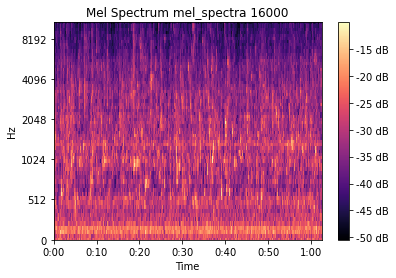

In [87]:
# test reading back
fe_mel_read=feature_extractor_from_file(os.path.abspath(BASE_FOLDER + r'\dataset\MEL_to_Pandas\MEL_v1_64_6dBpump00_abn0_00000000.pkl'), 
                                        BASE_FOLDER)
fe_mel_read.plot()
fe_mel_read.para_dict
# TODO fix the name overwrite !!

# Create all

In [93]:
import time  
def process_set(FileFindDict):
    t = time.time()
    
    mp = MEL_to_Pandas(BASE_FOLDER,
              r'\dataset\MEL_to_Pandas',
              fe_mel, 
              FileFindDict=FileFindDict,
              FileCountlimit=None,
              verbose=False)
    elapsed = time.time() - t
    print(elapsed)

    # TODO include pandas file name
    FileName = 'pandas_' + FileFindDict['machine'] + '_' + \
           FileFindDict['SNR'] + '_' + \
           ''.join(FileFindDict['ID']) + '_' + 'MEL_v1_64' + '.pkl'

    mp.to_pickle(FileName)

#process_set{'SNR': '6dB','machine': 'pump','ID': ['00','02','04','06']})
#process_set({'SNR': '6dB','machine': 'slider','ID': ['00','02','04','06']})
#process_set({'SNR': '6dB','machine': 'fan','ID': ['00','02','04','06']})
#process_set({'SNR': '6dB','machine': 'valve','ID': ['00','02','04','06']})
#process_set({'SNR': 'min6dB','machine': 'pump','ID': ['00','02','04','06']})
#process_set({'SNR': 'min6dB','machine': 'vave','ID': ['00','02','04','06']})
#process_set({'SNR': 'min6dB','machine': 'slider','ID': ['00','02','04','06']})
#process_set({'SNR': 'min6dB','machine': 'fan','ID': ['00','02','04','06']})


1700.8734571933746
2361.388838291168
